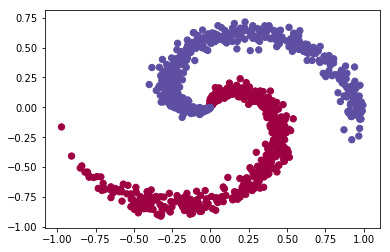

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
N = 500 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
data = np.zeros((N*K,D)) # data matrix (each row = single example)
label = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  label[ix] = j

# lets visualize the data:
plt.scatter(data[:, 0], data[:, 1], c=label, s=40, cmap=plt.cm.Spectral)
plt.show()


In [86]:
label = np.where(label==1,1,-1)

In [87]:
from sklearn.model_selection import train_test_split
X, testx, y, testy = train_test_split(data, label, test_size=0.2, random_state=0)

In [88]:
max_iter=10000 
kernel_type='linear'
C=1.0 
epsilon=0.001
n, d = X.shape[0], X.shape[1]
alpha = np.zeros((n))

In [89]:
def calc_acc(y, y_hat):
    idx = np.where(y_hat == 1)
    TP = np.sum(y_hat[idx] == y[idx])
    idx = np.where(y_hat == -1)
    TN = np.sum(y_hat[idx] == y[idx])
    return float(TP + TN)/len(y)

def kernel_linear(x1, x2):
    return np.dot(x1, x2.T)
def kernel_quadratic(x1, x2):
    return (np.dot(x1, x2.T) ** 2)
def get_rnd_int(a,b,z):
    i = z
    while i == z:
        i = rnd.randint(a,b)
    return i
def compute_L_H( C, alpha_prime_j, alpha_prime_i, y_j, y_i):
    if(y_i != y_j):
        return (max(0, alpha_prime_j - alpha_prime_i), min(C, C - alpha_prime_i + alpha_prime_j))
    else:
        return (max(0, alpha_prime_i + alpha_prime_j - C), min(C, alpha_prime_i + alpha_prime_j))
    
def calc_b(X, y, w):
    b_tmp = y - np.dot(w.T, X.T)
    return np.mean(b_tmp)
def calc_w(alpha, y, X):
    return np.dot(alpha * y, X)
def E(x_k, y_k, w, b):
    return h(x_k, w, b) - y_k
    # Prediction
def h(X, w, b):
    return np.sign(np.dot(w.T, X.T) + b).astype(int)


In [90]:
def fit(X, y):
    count = 0
    while True:
        count += 1
        alpha_prev = np.copy(alpha)
        for j in range(0, n):
            i = get_rnd_int(0, n-1, j) # Get random int i~=j
            x_i, x_j, y_i, y_j = X[i,:], X[j,:], y[i], y[j]
            k_ij = kernel_linear(x_i, x_i) + kernel_linear(x_j, x_j) - 2 * kernel_linear(x_i, x_j)
            if k_ij == 0:
                continue
            alpha_prime_j, alpha_prime_i = alpha[j], alpha[i]
            (L, H) = compute_L_H(C, alpha_prime_j, alpha_prime_i, y_j, y_i)

            # Compute model parameters
            w = calc_w(alpha, y, X)
            b = calc_b(X, y, w)

            # Compute E_i, E_j
            E_i = E(x_i, y_i, w, b)
            E_j = E(x_j, y_j, w, b)

            # Set new alpha values
            alpha[j] = alpha_prime_j + float(y_j * (E_i - E_j))/k_ij
            alpha[j] = max(alpha[j], L)
            alpha[j] = min(alpha[j], H)

            alpha[i] = alpha_prime_i + y_i*y_j * (alpha_prime_j - alpha[j])
            # Check convergence
        diff = np.linalg.norm(alpha - alpha_prev)
        if diff < epsilon:
            break
        if count >= max_iter:
            print("Iteration number exceeded the max of %d iterations" % (max_iter))
            return
        b = calc_b(X, y, w)
        if kernel_type == 'linear':
            w = calc_w(alpha, y, X)
            # Get support vectors
        alpha_idx = np.where(alpha > 0)[0]
        support_vectors = X[alpha_idx, :]
        print(count)
    return w,b,support_vectors,count

In [91]:
w,b,_,_=fit(X,y)

1
2
3
4
5
6


In [93]:
y_hat=h(testx,w,b)
calc_acc(testy,y_hat)

0.775

https://github.com/tonio73/data-science